# Get Pixel Coordinates of Target and Validation Star
### This notebook is useful for finding the coordinates (in pixels) of target and validation star. There are some things to consider, lsited below:
- If the frames are flipped (north is down), make sure that to flip pixel arrays with the numpy flipud method.
- Also, the pipeline seeks to minimize the distance to given coordinate pairs. It is adventageous to get as close as possible to the given target, if the taraget is crowded, there may be errors. This will eventually be improved and streamlined.
- It should only be necessary to edit the cells containing aperture location estimate and aperture radius (as well as the first cell in which one provides path information).

### Steps:
#### 1. load the first frame (provide the filepath in the next cell), note, the data may need to be flipped, compare with the star field at: https://aladin.cds.unistra.fr/AladinLite/

In [9]:
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils.segmentation import detect_sources
import numpy as np
import matplotlib.pyplot as plt
import os

In [20]:
#Add your path. Data needs to be flipped? T/F, change if needed.
path = "/Users/spencerfreeman/Desktop/stepup/hat-p-61/hat-p-61b-0001_lrp.fit"
flip = True

Verify that your image is in the correct orientation...


Text(0.5, 1.0, 'hat-p-61b-0001_lrp.fit')

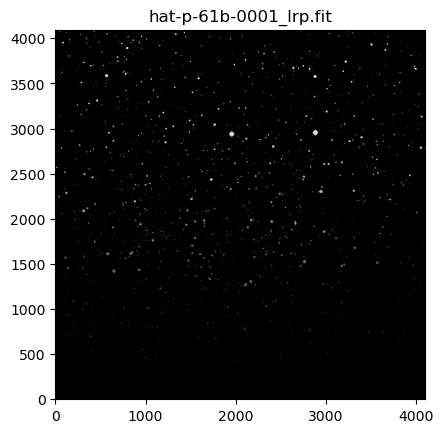

In [21]:
data = fits.getdata(path)
path,title = os.path.split(path)

if(flip):
    data = np.flipud(data)

mean, median, std = sigma_clipped_stats(data, sigma=3.0)

segm = detect_sources(data-mean, 3*std, npixels=5)

print("Verify that your image is in the correct orientation...")
plt.imshow(segm.data, origin="lower", cmap ='Greys_r')
plt.title(title)

#### 2. Estimate target star aperture placement, this might take a few iterarations. To determine placement/size, reference the 2D coutouts and adjust location as needed.

In [22]:
from astropy.nddata import Cutout2D
from photutils.aperture import CircularAperture

In [31]:
#where we center the cutout, in pixels, this is roughly the center of a 4096x4096 frame, do not base aperture pixel coordinates on the cutout scale.
target_aperture_location_esimate = (2171,  1982)
target_aperture_radius = 7

Text(0.5, 1.0, 'hat-p-61b-0001_lrp.fit')

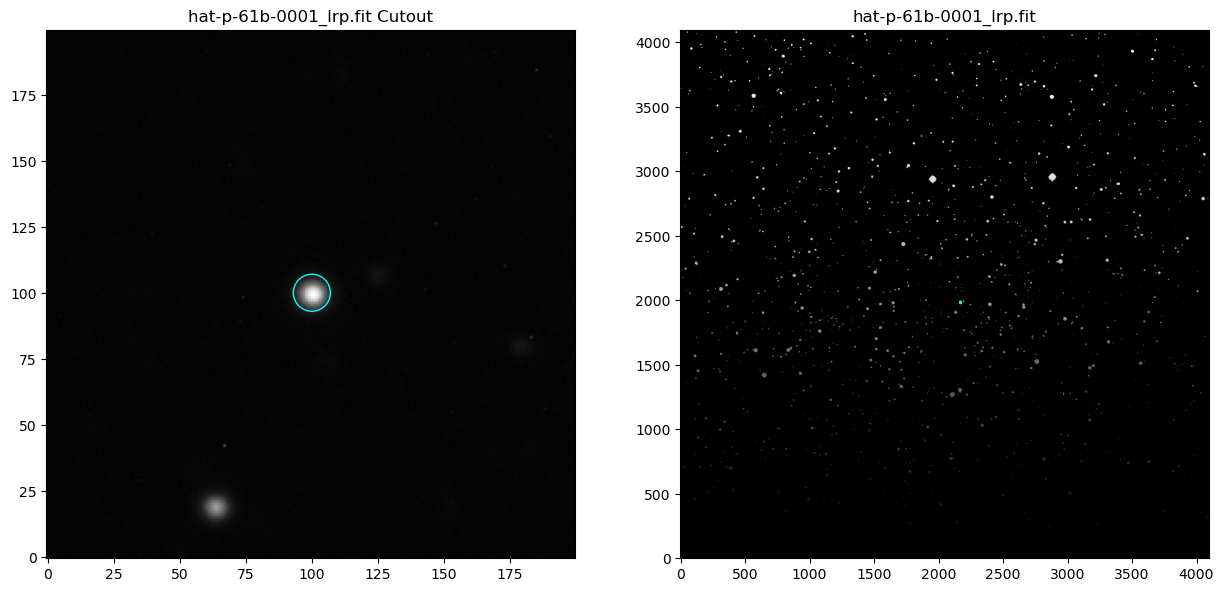

In [32]:
fig, ax = plt.subplots(1,2,figsize=(15, 10))
cutout_center_location = target_aperture_location_esimate 
cutout_size = (200, 200)
cutout = Cutout2D(data, cutout_center_location, cutout_size)
target_aperture_cutout = CircularAperture((cutout_size[0]/2,cutout_size[1]/2), target_aperture_radius)
target_aperture_cutout.plot(ax[0],color='cyan')
target_aperture_main_field = CircularAperture(target_aperture_location_esimate, target_aperture_radius)
target_aperture_main_field.plot(ax[1], color='cyan')
ax[0].imshow(cutout.data, origin='lower', cmap='Greys_r')
ax[0].set_title(f"{title} Cutout")
ax[1].imshow(segm.data, origin='lower', cmap='Greys_r')
ax[1].set_title(title)

#### 3. Repeat the process for validation and comparison star, attempt to match the radius of these apertures to that of the target star.

#### Validation Star:

In [41]:
validation_aperture_location_esimate = (2135, 1905)
validation_aperture_radius = 6

Text(0.5, 1.0, 'hat-p-61b-0001_lrp.fit')

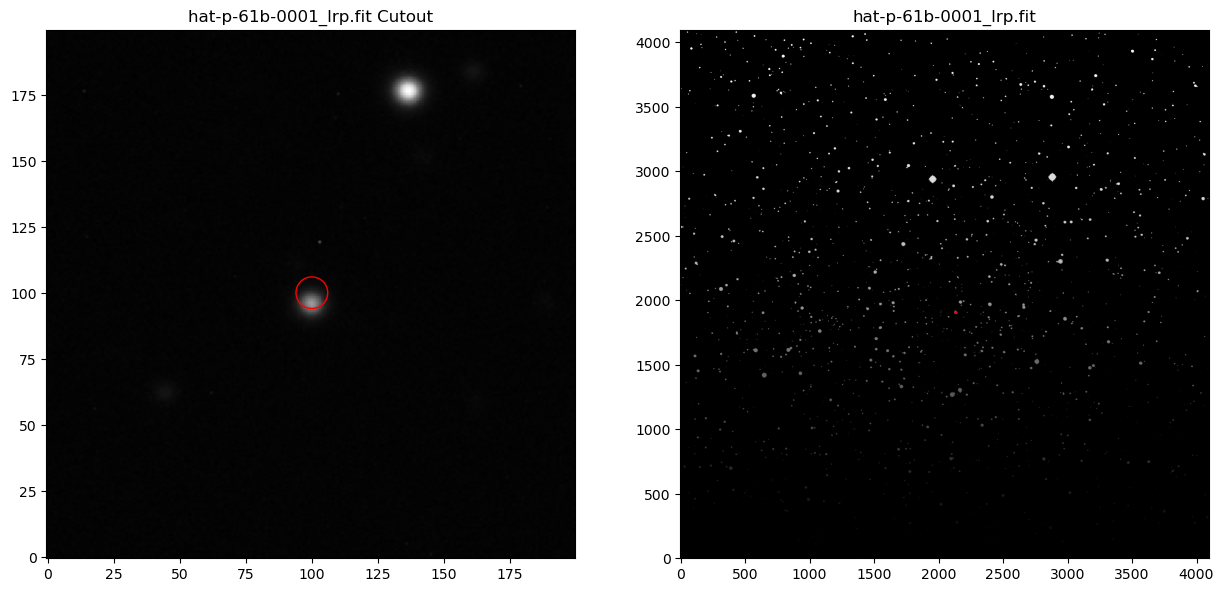

In [42]:
fig, ax = plt.subplots(1,2,figsize=(15, 10))
cutout_center_location = validation_aperture_location_esimate 
cutout_size = (200, 200)
cutout = Cutout2D(data, cutout_center_location, cutout_size)
validation_aperture_cutout = CircularAperture((cutout_size[0]/2,cutout_size[1]/2), validation_aperture_radius)
validation_aperture_cutout.plot(ax[0],color='red')
validation_aperture_main_field = CircularAperture(validation_aperture_location_esimate, validation_aperture_radius)
validation_aperture_main_field.plot(ax[1], color='red')
ax[0].imshow(cutout.data, origin='lower', cmap='Greys_r')
ax[0].set_title(f"{title} Cutout")
ax[1].imshow(segm.data, origin='lower', cmap='Greys_r')
ax[1].set_title(title)

#### And once more for the comparison star:

In [47]:
comparison_aperture_location_esimate = (2220, 2470)
comparison_aperture_radius = 6

Text(0.5, 1.0, 'hat-p-61b-0001_lrp.fit')

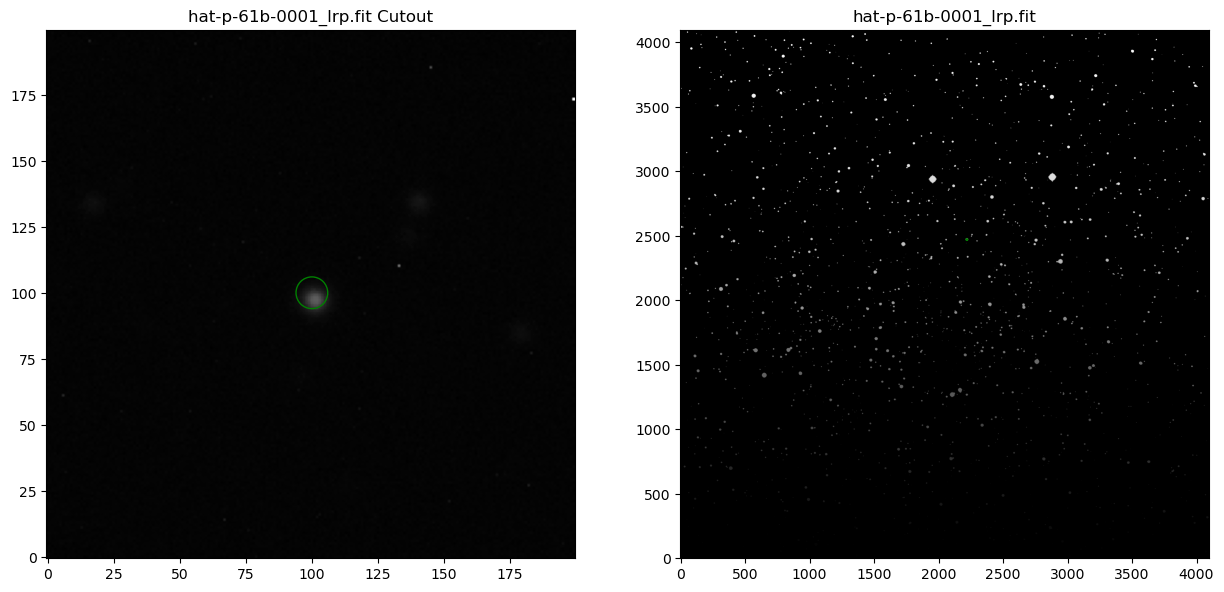

In [48]:
fig, ax = plt.subplots(1,2,figsize=(15, 10))
cutout_center_location = comparison_aperture_location_esimate 
cutout_size = (200, 200)
cutout = Cutout2D(data, cutout_center_location, cutout_size)
comparison_aperture_cutout = CircularAperture((cutout_size[0]/2,cutout_size[1]/2), comparison_aperture_radius)
comparison_aperture_cutout.plot(ax[0],color='green')
comparison_aperture_main_field = CircularAperture(comparison_aperture_location_esimate, comparison_aperture_radius)
comparison_aperture_main_field.plot(ax[1], color='green')
ax[0].imshow(cutout.data, origin='lower', cmap='Greys_r')
ax[0].set_title(f"{title} Cutout")
ax[1].imshow(segm.data, origin='lower', cmap='Greys_r')
ax[1].set_title(title)

#### For user_input.txt:

In [49]:
print(f"Target Star Pixel Coordinates: {target_aperture_location_esimate} \nValidation Star Pixel Coordinates: {validation_aperture_location_esimate} \nComparison Star Pixel Coordinates: {comparison_aperture_location_esimate}")

Target Star Pixel Coordinates: (2171, 1982) 
Validation Star Pixel Coordinates: (2135, 1905) 
Comparison Star Pixel Coordinates: (2220, 2470)
